# Modelling Gradient Descent

Here we will create a simple algorithm that uses gradient descent to optimise a simple linear regression model. 
The data are fetched from the [BOM](http://www.bom.gov.au/climate/data/index.shtml) and show temperatures for the Sydney (Kinsford Smith) and Newcastle (Williamstown RAAF) airports. 

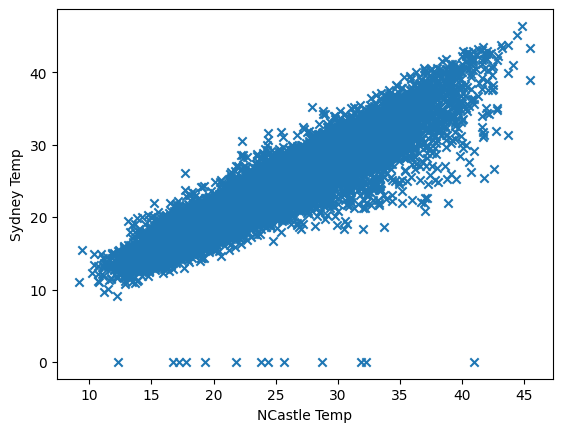

,DDMMYYYY,MaxTempNewcastleAirport,MaxTempSydneyAirport
252,19420910,18.6,16.2
253,19420911,18.8,17.1
254,19420912,18.9,14.9
255,19420913,19.6,20.2
256,19420914,23.8,24.3


In [21]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()

# Plot the data (to observe correlation)
plt.scatter(dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
plt.xlabel('NCastle Temp')
plt.ylabel('Sydney Temp')
plt.show()

# See a sample of raw data
dataset.head()

Here's the beginnings of an OOP approach. It plots the existing data in blue and the predicted line in red. 


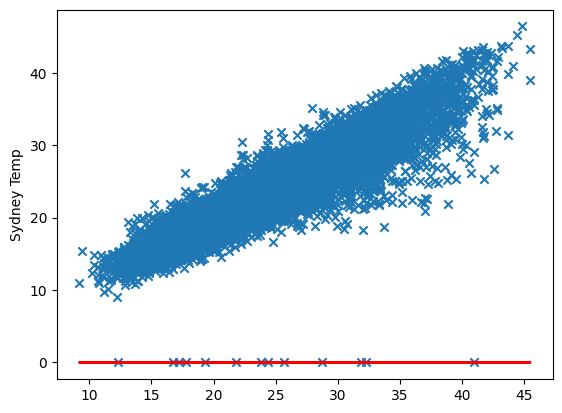

Current loss = 531.2686256339159, loss_if_m_increased = 45.58230422982812, loss_if_m_decreased = 1559.9521969296861
Current loss = 531.2686256339159, loss_if_b_increased = 500.60560141604986, loss_if_b_decreased=562.887933377923
Increase b by 0.6914779555926018


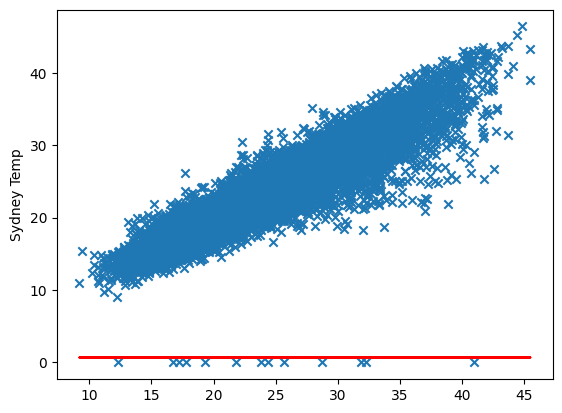

Current loss = 500.60560141604986, loss_if_m_increased = 42.98842023596994, loss_if_m_decreased = 1469.8800718345808
Current loss = 500.60560141604986, loss_if_b_increased = 471.75529392017245, loss_if_b_decreased=530.3569989944762
Increase b by 0.6712265200917235


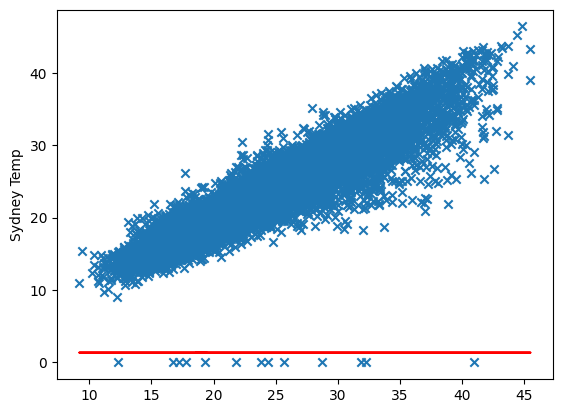

Current loss = 471.75529392017245, loss_if_m_increased = 40.577460344218046, loss_if_m_decreased = 1385.1031914912307
Current loss = 471.75529392017245, loss_if_b_increased = 444.6106049779909, loss_if_b_decreased=499.7491423914102
Increase b by 0.6515978549137154


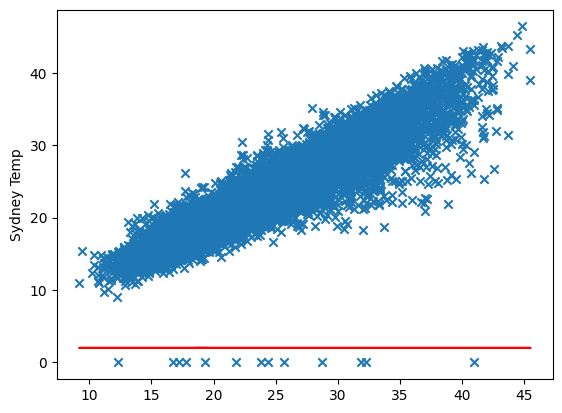

Current loss = 444.6106049779909, loss_if_m_increased = 38.33780350363768, loss_if_m_decreased = 1305.309518078376
Current loss = 444.6106049779909, loss_if_b_increased = 419.0707680169849, loss_if_b_decreased=470.9507410279574
Increase b by 0.6325737462780066


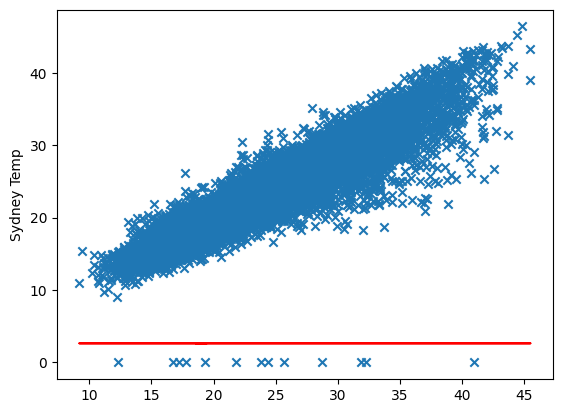

Current loss = 419.0707680169849, loss_if_m_increased = 36.25854683488113, loss_if_m_decreased = 1230.2054301708242
Current loss = 419.0707680169849, loss_if_b_increased = 395.04097399420965, loss_if_b_decreased=443.8548894221907
Increase b by 0.6141365411822409


In [22]:
class Model():
    def __init__(self, data):
        self.dataset = data
        # self.m = 0.9
        # self.b = 0.5
        self.m = 0
        self.b = 0
        self.learning_rate = .03
        self.cycles = 100

    def plot(self):
        predictions = self.predict()
        plt.scatter(self.dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
        plt.plot(self.dataset['MaxTempNewcastleAirport'],predictions, 'r')
        plt.ylabel('Sydney Temp')
        plt.show()

    def predict(self, m=None, b=None):
        if not m: 
            m = self.m
        if not b:
            b = self.b
        # print(f'predicting with m={m}, and b = {b}')
        predictions = [x * m + b for x in dataset['MaxTempNewcastleAirport']]
        return predictions
    
    def loss(self, m=None, b=None):
        if not m: #This allows us to pass in m and b if desired, using the model's existing m and b as a fallback. 
            m = self.m
        if not b:
            b = self.b
        predictions = self.predict(m=m,b=b)
        loss = self.dataset['MaxTempSydneyAirport'] - predictions
        loss_squared = loss * loss
        mse = loss_squared.mean()
        # print(f'Predicted mse={mse}')
        return mse
    
    def decide_on_change_in_b(self):
        current_loss = self.loss()
        delta = math.sqrt(current_loss) * self.learning_rate
        loss_if_b_increased = self.loss(b=(self.b + delta))
        loss_if_b_decreased = self.loss(b=(self.b - delta))

        print(f'Current loss = {current_loss}, loss_if_b_increased = {loss_if_b_increased}, loss_if_b_decreased={loss_if_b_decreased}')

        if loss_if_b_increased < current_loss:
            print(f'Increase b by {delta}')
            return delta
        elif loss_if_b_decreased < current_loss:
            print(f'decrease b by {delta}')
            return delta
        else:
            return 0
        
    
    def decide_on_change_in_m(self):
        current_loss = self.loss()
        delta = math.sqrt(current_loss) * self.learning_rate
        loss_if_m_increased = self.loss(m=(self.m + delta))
        loss_if_m_decreased = self.loss(m=(self.m - delta))
        print(f'Current loss = {current_loss}, loss_if_m_increased = {loss_if_m_increased}, loss_if_m_decreased = {loss_if_m_decreased}')
        if loss_if_m_increased < current_loss:
            print(f'Increase by m {delta}')
            return delta
        elif loss_if_m_decreased < current_loss:
            print(f'decrease by m {delta}')
            return - delta
        else:
            return 0
    
    
    def train(self):
        for i in range(self.cycles):
            self.plot()
            self.m = self.m + self.decide_on_change_in_m()
            self.b = self.b + self.decide_on_change_in_b()

model = Model(dataset)
model.train()
